# Library

In [95]:
import warnings
warnings.filterwarnings('ignore')

#basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor
%matplotlib inline

#eda
from scipy.stats import chi2_contingency
import missingno as msno

#prep
import category_encoders as ce
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold,cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_ranInt

# 1. Business Understanding

- Background:
  <br>The automotive industry is one of the largest in the world, with the used car market playing a significant role. Understanding the factors that influence the pricing of used cars is crucial for various stakeholders, including buyers, sellers, and dealerships. Factors such as mileage, brand, model, count of previous owners, condition, ext. can all impact the price of a used car. Analyzing these factors through regression analysis can provide valuable insights into pricing trends and help stakeholders make informed decisions.  
- Problem:
  <br>The problem is we dont know yet the best method that accurately estimates the price of used cars based on various attributes.
- Goal:
  <br>The primary goal of this project is to create a robust regression model that accurately predicts the prices of used cars. This involves identifying and analyzing the key factors that affect the pricing of used cars and building a regression model that can generalize well to predict prices for unseen data accurately. By achieving this goal, stakeholders such as buyers, sellers, and dealerships can benefit from having a reliable tool to estimate the value of used cars. Additionally, insights gained from the analysis can inform pricing strategies and decision-making processes in the used car market.
- Objectives:
  1. Data collection: <br>gathering dataset & its information about used car price and its atributes.
  2. Data Exploration: <br>understand the dataset spesification (data structure, quality, distribution, unseen pattern, ext.).
  3. Data Preparation: <br>prepare the data for modeling (data cleaning, transformation, feature engineering).
  4. Model Building: <br>train multiple models and choose the best one.
  5. Evaluation & Tuning: <br>Assess the performance of the regression models and identify areas for improvement.
  6.  Interpretation & insigh: <br>Interpret the coefficients or feature importances of the trained regression models to understand the relative importance of different features in determining the price of used cars. 
Extract actionable insights from the analysis to inform stakeholders about the factors influencing used car prices and potential strategies for maximizing value.t

# 2. Data Collection

**About Dataset**

Used Car Prices in UK Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, autotrader.co.uk. This dataset comprises 3,685 data points, each representing a unique vehicle listing, and includes thirteen distinct features providing valuable insights into the world of automobiles. The feature names are:
- unnamed : -
- Title: brand and model.
- Price: car prices (pounds.).
- Milage: total travelled distance (Miles).
- Registration Year: the year when a car was registered.
- Previous Owner: count of owners before.
- Fuel type: fuel used by car.
- Body type: form of vehicle.
- Engine: displacement Volume (Liters).
- Gearbox: transmission used by car.
- Doors: count of doors.
- Seats: vehicle capacity.
- Emission class: standart emission (Euro standard).

In [2]:
df = pd.read_csv('used_cars_UK.csv')
df.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.drop(columns=['unnamed:_0','service_history'])
df = df.rename(columns={'mileage(miles)':'mileage'})

In [4]:
#check point
df_original = df.copy()

# 3. Data Exploration

## Overall Overview

In [5]:
#overall overview
df.info()
print()
for col in df:
  print(col,'-#nunique: ',df[col].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3685 non-null   object 
 1   price              3685 non-null   int64  
 2   mileage            3685 non-null   int64  
 3   registration_year  3685 non-null   int64  
 4   previous_owners    2276 non-null   float64
 5   fuel_type          3685 non-null   object 
 6   body_type          3685 non-null   object 
 7   engine             3640 non-null   object 
 8   gearbox            3685 non-null   object 
 9   doors              3660 non-null   float64
 10  seats              3650 non-null   float64
 11  emission_class     3598 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 345.6+ KB

title -#nunique:  469
price -#nunique:  866
mileage -#nunique:  1570
registration_year -#nunique:  40
previous_owners -#nunique:  9
fuel_type -#nunique:  6


- There are 3685 entries and 12 columns (6 object & 6 numeric).
- price & mileage should contain float values, while previous owners, doors and seats should contain integral values.
- it seems that there are columns that contain missing values.
- it seems that there are too much type of fuel.
- previous owners and registration year are sortable discreate columns with much values, while doors and seats are unsortable discreate columns with a few unique values.
- engine and emission class have sortable values.

In [6]:
df['fuel_type'].value_counts()

Petrol                   2361
Diesel                   1218
Petrol Hybrid              47
Electric                   31
Petrol Plug-in Hybrid      27
Diesel Hybrid               1
Name: fuel_type, dtype: int64

too much type of hybrid

## Duplicated Value Handling

In [7]:
#duplicated values
print(f'duplicated values: {df.duplicated().sum()}')
print(f'{len(df)} baris')

duplicated values: 826
3685 baris


In [8]:
#drop duplicate
df = df.drop_duplicates()
print(f'duplicated values: {df.duplicated().sum()}')
print(f'tersisa {len(df)} baris')

duplicated values: 0
tersisa 2859 baris


## Missing Value Handling

In [9]:
print(f'missing values: {df.isna().sum().sum()} \n{df.isna().sum()[df.isna().sum()>0]}')
print(f'\nmissing values: {round((df.isna().sum().sum())/len(df)*100,2)}% \n{round((df.isna().sum()[df.isna().sum()>0])/len(df)*100,2)}\n')

missing values: 1119 
previous_owners    983
engine              17
doors               25
seats               35
emission_class      59
dtype: int64

missing values: 39.14% 
previous_owners    34.38
engine              0.59
doors               0.87
seats               1.22
emission_class      2.06
dtype: float64



**drop missing value <1%**

In [10]:
df = df.dropna(subset=['engine','doors','emission_class','seats']).reset_index(drop=True)
print(f'\nmissing values: {round((df.isna().sum().sum())/len(df)*100,2)}% \n{round((df.isna().sum()[df.isna().sum()>0])/len(df)*100,2)}\n')
print(f'tersisa {len(df)} baris')


missing values: 34.16% 
previous_owners    34.16
dtype: float64

tersisa 2793 baris


In [11]:
#checkpoint
df.reset_index(drop=True,inplace=True)
df_hampirclean = df.copy()

In [12]:
#restart point
df = df_hampirclean.copy()

In [13]:
#imputation prep
##int to float
desimal = ['price','mileage']
for col in desimal:
    df[col] = df[col].astype(float)
##float to int
integral = ['doors','seats']
for col in integral:
    df[col] = df[col].astype(int)
##ordinal encoding
numerik = ['engine','emission_class']
for col in numerik:
    df[col] = df[col].replace({'Euro ':'','L':''},regex=True)
    df[col] = pd.to_numeric(df[col],errors='coerce')
##regroup
df['fuel_type'] = np.where(df['fuel_type'].str.contains('Hybrid'),'Hybrid',df['fuel_type'])
##one-hot & label encoding
oh_col = ['fuel_type','gearbox']
one_hot = pd.get_dummies(df[oh_col],drop_first=True)
df = pd.concat([df.drop(columns=oh_col), one_hot], axis=1)
df = df.replace({False:0,True:1},regex=True)
df.drop(columns='title',inplace=True)

df = df.reset_index(drop=True)
df_encoded = df.copy()

In [14]:
#split
X = df.drop(columns='price')
y = df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

##freq. encoding
count_encoder = ce.CountEncoder()
X_train['body_type'] = count_encoder.fit_transform(X_train['body_type'])
X_test['body_type'] = count_encoder.transform(X_test['body_type'])

#imputation
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

#merge
X_train_imputed['price'] = y_train.values
X_test_imputed['price'] = y_test.values

df_imputed = pd.concat([X_train_imputed, X_test_imputed], ignore_index=True)

In [15]:
print(f"before: {df['previous_owners'].nunique()} unique values")
print(sorted(df['previous_owners'].unique()))
print(f"after: {df_imputed['previous_owners'].nunique()} unique values")
print(sorted(df_imputed['previous_owners'].unique()))

before: 9 unique values
[3.0, 4.0, nan, 1.0, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0]
after: 29 unique values
[1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 7.0, 8.0, 9.0]


it should be the same as before

In [16]:
df_imputed['previous_owners'] = df_imputed['previous_owners'].apply(floor)
print(f"{df_imputed['previous_owners'].nunique()} unique values")
print(sorted(df_imputed['previous_owners'].unique()))

9 unique values
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
#imput to df
df = df_hampirclean.copy()
df['previous_owners'] = df_imputed['previous_owners']

In [18]:
print(f'\nmissing values: {round((df.isna().sum().sum())/len(df)*100,2)}% \n{round((df.isna().sum()[df.isna().sum()>0])/len(df)*100,2)}\n')
print(f'tersisa {len(df)} baris')


missing values: 0.0% 
Series([], dtype: float64)

tersisa 2793 baris


In [19]:
#checkpoints
df_clean = df.copy()

In [20]:
df

,title,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class
0,SKODA Fabia,6900,70189,2016,3,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6
1,Vauxhall Corsa,1495,88585,2008,4,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4
2,Hyundai i30,949,137000,2011,2,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5
3,MINI Hatch,2395,96731,2010,5,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4
4,Vauxhall Corsa,1000,85000,2013,4,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5
...,...,...,...,...,...,...,...,...,...,...,...,...
2788,Renault Megane,1395,76202,2006,4,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4
2789,Audi A4,6990,119000,2012,1,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5
2790,BMW 3 Series,3995,139000,2013,5,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5
2791,Honda Accord,1390,179190,2007,3,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4


## Feature Engineering

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2793 non-null   object 
 1   price              2793 non-null   int64  
 2   mileage            2793 non-null   int64  
 3   registration_year  2793 non-null   int64  
 4   previous_owners    2793 non-null   int64  
 5   fuel_type          2793 non-null   object 
 6   body_type          2793 non-null   object 
 7   engine             2793 non-null   object 
 8   gearbox            2793 non-null   object 
 9   doors              2793 non-null   float64
 10  seats              2793 non-null   float64
 11  emission_class     2793 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 262.0+ KB


- float: price & mileage.
- integral: doors & seats.

**dtype handling**

In [22]:
##int to float
desimal = ['price','mileage']
for col in desimal:
    df[col] = df[col].astype(float)
    print(col,':', df[col].dtype)
##float to int
integral = ['doors','seats']
for col in integral:
    df[col] = df[col].astype(int)
    print(col,':', df[col].dtype)
##continous
numerik = ['engine']
for col in numerik:
    df[col] = df[col].replace({'L':''},regex=True)
    df[col] = pd.to_numeric(df[col],errors='coerce')
    print(col,':', df[col].dtype)

price : float64
mileage : float64
doors : int32
seats : int32
engine : float64


**regroup fuel_type**

In [23]:
##regroup
df['fuel_type'] = np.where(df['fuel_type'].str.contains('Hybrid'),'Hybrid',df['fuel_type'])

**extract brand & model**

In [24]:
df['brand'] = np.where(df['title'].str.contains(r'Land Rover|Alfa Romeo|DS Automobiles'),
                       df['title'].str.split(n=2, expand=True)[0]+' '+df['title'].str.split(n=2, expand=True)[1],
                       df['title'].str.split(n=1, expand=True)[0])

df = df.rename(columns={'title': 'model'})
df['brand'].unique()

array(['SKODA', 'Vauxhall', 'Hyundai', 'MINI', 'Ford', 'Peugeot', 'BMW',
       'Citroen', 'Mercedes-Benz', 'Mazda', 'Saab', 'Volkswagen', 'Honda',
       'MG', 'Toyota', 'Volvo', 'SEAT', 'Nissan', 'Alfa Romeo', 'KIA',
       'Proton', 'Fiat', 'Renault', 'Audi', 'Mitsubishi', 'Lexus',
       'Land Rover', 'Chevrolet', 'Suzuki', 'Dacia', 'Daihatsu', 'Jeep',
       'Jaguar', 'Chrysler', 'Rover', 'DS Automobiles', 'Daewoo', 'Dodge',
       'Subaru', 'Porsche', 'Infiniti', 'Abarth', 'Smart', 'Maserati',
       'Ssangyong'], dtype=object)

**extract brands by manufacturer country**

In [25]:
country_brand = {
    'SKODA': 'Czech Republic',
    'Vauxhall': 'United Kingdom',
    'Hyundai': 'South Korea',
    'MINI': 'United Kingdom',
    'Ford': 'United States',
    'Peugeot': 'France',
    'BMW': 'Germany',
    'Citroen': 'France',
    'Mercedes-Benz': 'Germany',
    'Mazda': 'Japan',
    'Saab': 'Sweden',
    'Volkswagen': 'Germany',
    'Honda': 'Japan',
    'MG': 'United Kingdom',
    'Toyota': 'Japan',
    'Volvo': 'Sweden',
    'SEAT': 'Spain',
    'Nissan': 'Japan',
    'Alfa Romeo': 'Italy',
    'KIA': 'South Korea',
    'Proton': 'Malaysia',
    'Fiat': 'Italy',
    'Renault': 'France',
    'Audi': 'Germany',
    'Mitsubishi': 'Japan',
    'Lexus': 'Japan',
    'Land Rover': 'United Kingdom',
    'Chevrolet': 'United States',
    'Suzuki': 'Japan',
    'Dacia': 'Romania',
    'Daihatsu': 'Japan',
    'Jeep': 'United States',
    'Jaguar': 'United Kingdom',
    'Chrysler': 'United States',
    'Rover': 'United Kingdom',
    'DS Automobiles': 'France',
    'Daewoo': 'South Korea',
    'Dodge': 'United States',
    'Subaru': 'Japan',
    'Porsche': 'Germany',
    'Infiniti': 'Japan',
    'Abarth': 'Italy',
    'Smart': 'Germany',
    'Maserati': 'Italy',
    'Ssangyong': 'South Korea'
}
df['country'] = df['brand'].map(country_brand)
df['country'].unique()

array(['Czech Republic', 'United Kingdom', 'South Korea', 'United States',
       'France', 'Germany', 'Japan', 'Sweden', 'Spain', 'Italy',
       'Malaysia', 'Romania'], dtype=object)

In [26]:
if len(df['brand'].unique()) == len(country_brand):
    print('CORRECT')

CORRECT


**extract country's continent**

In [27]:
country_continent = {
    'Czech Republic': 'Europe',
    'United Kingdom': 'Europe',
    'South Korea': 'Asia',
    'United States': 'North America',
    'France': 'Europe',
    'Germany': 'Europe',
    'Japan': 'Asia',
    'Sweden': 'Europe',
    'Spain': 'Europe',
    'Italy': 'Europe',
    'Malaysia': 'Asia',
    'Romania': 'Europe'
}
df['continent'] = df['country'].map(country_continent)
df['continent'].unique()

array(['Europe', 'Asia', 'North America'], dtype=object)

In [28]:
len(df['country'].unique())

12

## Outliers Handling

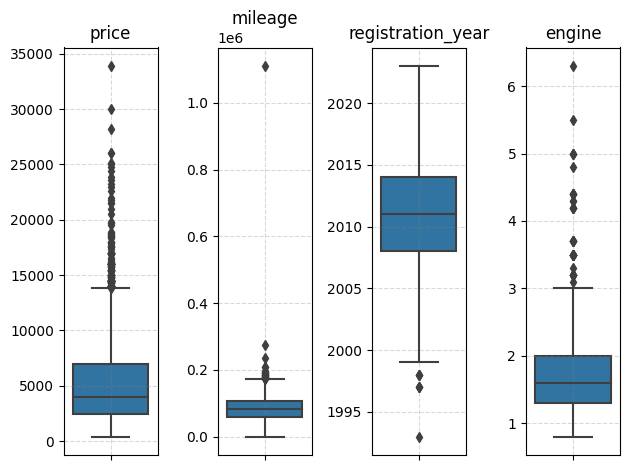

In [29]:
kontinu = ['price','mileage','registration_year','engine']
for i in range(0,len(kontinu)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df[kontinu[i]])
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(kontinu[i])
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [30]:
print(sorted(df['registration_year'].unique()))

[1993, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [31]:
dropr = df[df['registration_year']==1993]
dropr

,model,price,mileage,registration_year,previous_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,brand,country,continent
1948,Volkswagen Polo,2750.0,31000.0,1993,1,Petrol,Coupe,1.0,Manual,3,5,Euro 1,Volkswagen,Germany,Europe


In [32]:
df = df.drop(df[df['registration_year'] == 1993].index)
print(sorted(df['registration_year'].unique()))

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [33]:
kontinu = ['price','mileage']
for i in kontinu:
    Q3 = df[i].quantile(0.75)
    Q1 = df[i].quantile(0.25)
    IQR = Q3-Q1
    bawah = Q1-1.5*IQR
    atas = Q3+1.5*IQR
    outlier = (df[i] < bawah) | (df[i] > atas)
    df = df[~outlier]

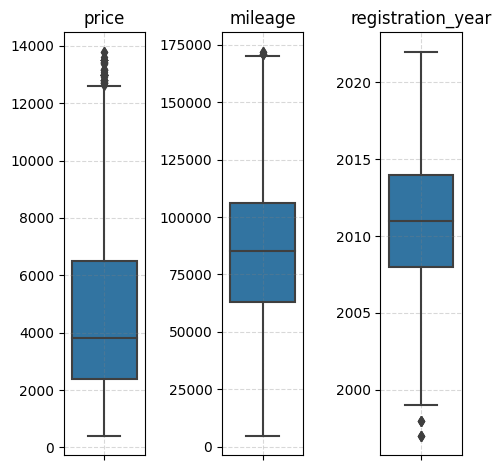

In [34]:
kontinu = ['price','mileage','registration_year']
for i in range(0,len(kontinu)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df[kontinu[i]])
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(kontinu[i])
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [35]:
print(f'tersisa {len(df)} baris')

tersisa 2612 baris


In [36]:
df.reset_index(drop=True,inplace=True)

In [37]:
#checkpoint
df_eda = df.copy()

## EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              2612 non-null   object 
 1   price              2612 non-null   float64
 2   mileage            2612 non-null   float64
 3   registration_year  2612 non-null   int64  
 4   previous_owners    2612 non-null   int64  
 5   fuel_type          2612 non-null   object 
 6   body_type          2612 non-null   object 
 7   engine             2612 non-null   float64
 8   gearbox            2612 non-null   object 
 9   doors              2612 non-null   int32  
 10  seats              2612 non-null   int32  
 11  emission_class     2612 non-null   object 
 12  brand              2612 non-null   object 
 13  country            2612 non-null   object 
 14  continent          2612 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 285.8+ KB


### Statistics Summary

In [39]:
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

**categoric stats**

In [40]:
df[cat].describe()

,model,fuel_type,body_type,gearbox,emission_class,brand,country,continent
count,2612,2612,2612,2612,2612,2612,2612,2612
unique,392,3,9,2,5,45,12,3
top,Vauxhall Corsa,Petrol,Hatchback,Manual,Euro 5,Vauxhall,Germany,Europe
freq,152,1699,1621,2065,1079,378,609,1714


- Vauxhall is the biggest brand in this dataset with their Corsa as the top model.
- most of the vehicles in this dataset are European brands, especially germany brands
- from 3 types of fuel, petrol becomes the most commonly used.
- hatchback is the common body type.
- almost all vehicles have manual transmission.
- most of the vehicles have 1.6L of engine displacement.
- Euro 5 is the most common emmision class that vehicles have.
- almost all comparisons of counts per category in this dataset are significant.

**numeric stats**

In [41]:
df[num].describe().round(2)

,price,mileage,registration_year,previous_owners,engine,doors,seats
count,2612.00,2612.00,2612.00,2612.00,2612.00,2612.00,2612.00
mean,4685.50,85181.71,2011.05,2.85,1.64,4.31,4.88
std,3064.85,31802.34,4.22,1.36,0.51,0.99,0.59
min,400.00,4750.00,1997.00,1.00,0.80,2.00,2.00
25%,2394.75,63000.00,2008.00,2.00,1.30,3.00,5.00
50%,3799.00,85213.50,2011.00,3.00,1.60,5.00,5.00
75%,6495.00,106000.00,2014.00,4.00,2.00,5.00,5.00
max,13799.00,172000.00,2022.00,9.00,6.30,5.00,7.00


- all columns are normal
- price columns seems to have skew distribution, while mileage seems to have normal distribution.
- most of the cars have less than 5 owners before.
- most of the cars have 5 doors or/and 5 seats.

### Univariate Analysis

**numeric distribution**

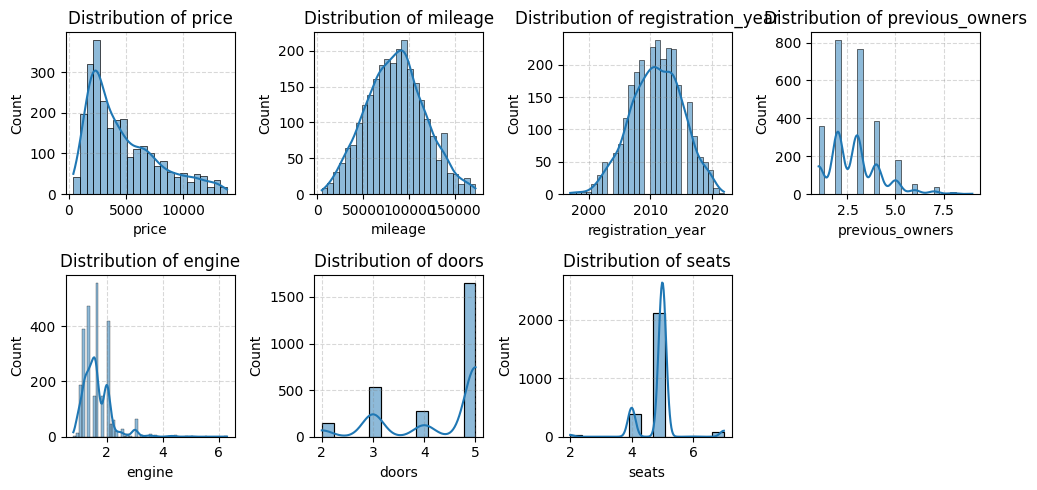

In [42]:
plt.figure(figsize=(10,5))
for i in range(0,len(num)):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[num[i]], kde=True)
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(f'Distribution of {num[i]}')

plt.tight_layout()

- the distribution of price is positively skewed, while mileage and reg. year are relatively normal.
- mileage has a few outliers that far away from the most of value.
- previous_owners, doors, and seats are discreate columns with a few categories.

**Categorical Distribution**

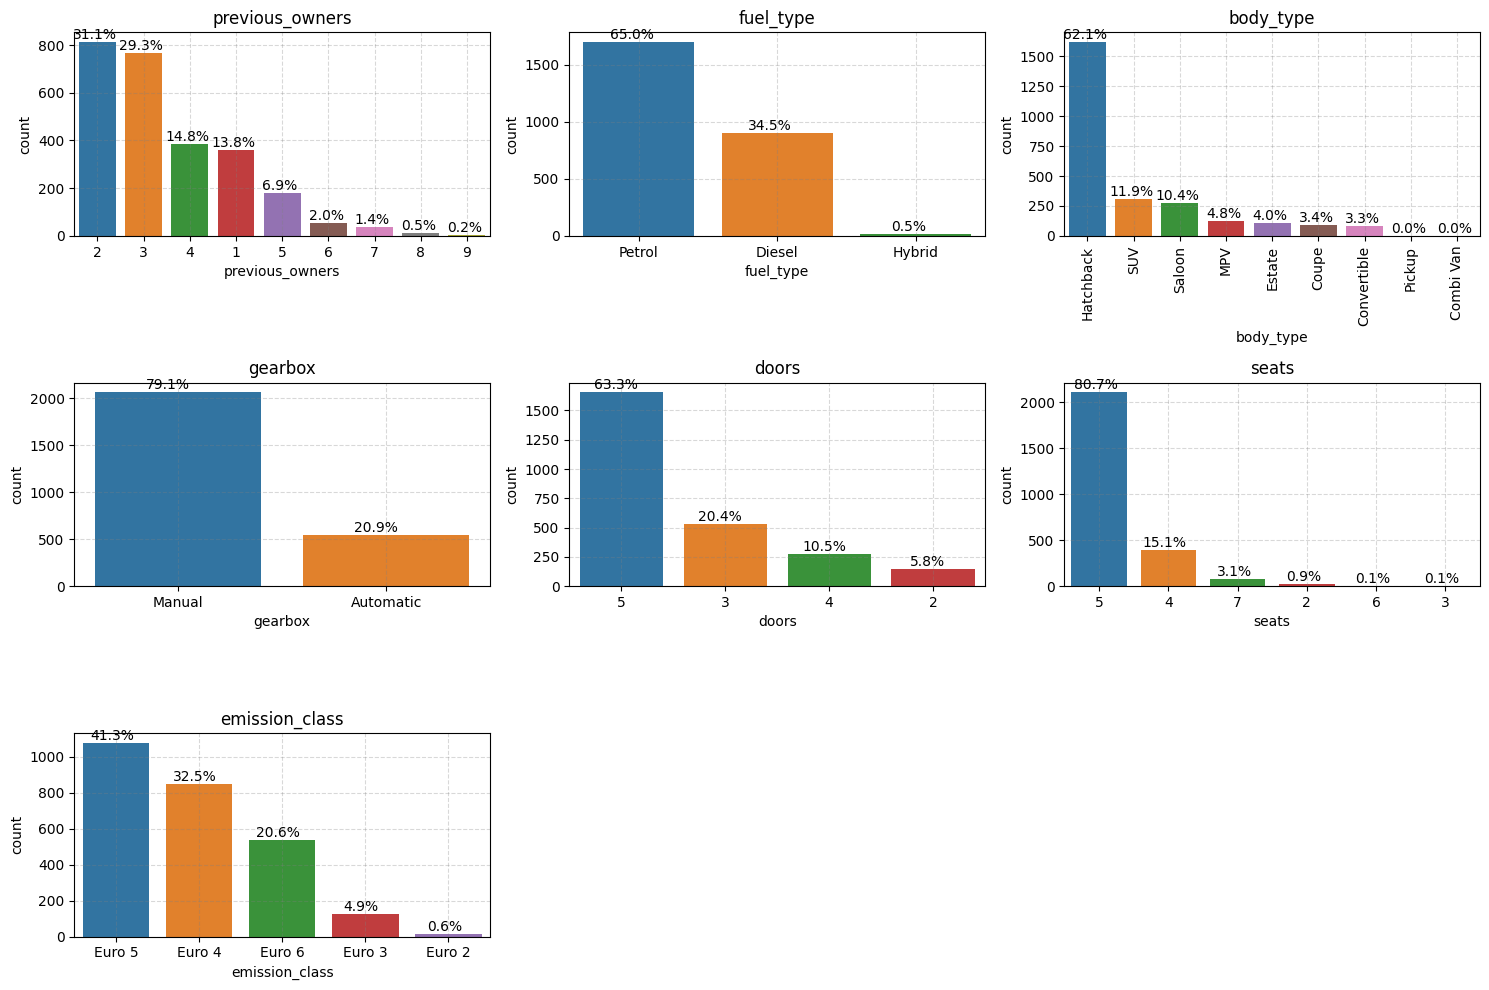

In [43]:
features = ['previous_owners','fuel_type','body_type','gearbox','doors','seats','emission_class']
plt.figure(figsize=(15,10))
for idx,i in enumerate(features):
    urut = df[i].value_counts(ascending=False).index
    plt.subplot(3,3,idx+1)
    ax=sns.countplot(x=df[i],order=urut)
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(i)
    if i=='body_type':
        plt.xticks(rotation=90)
    total = float(len(df[i]))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

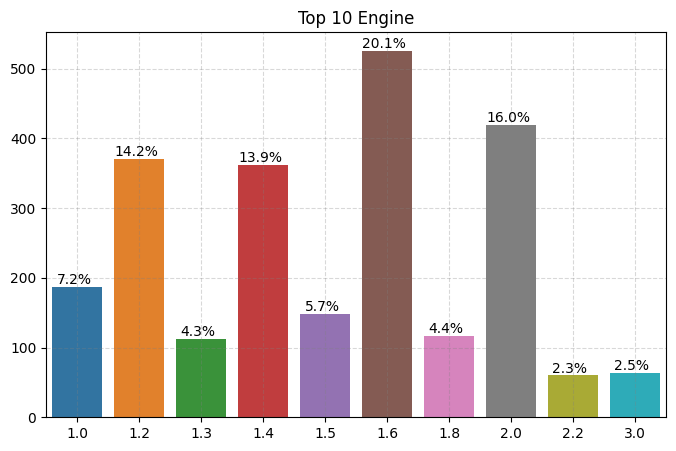

In [44]:
top10_engine = df['engine'].value_counts().head(10)

plt.figure(figsize=(8,5))
ax=sns.barplot(x=top10_engine.index,y=top10_engine.values)
plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
plt.title('Top 10 Engine')
total = float(len(df[i]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

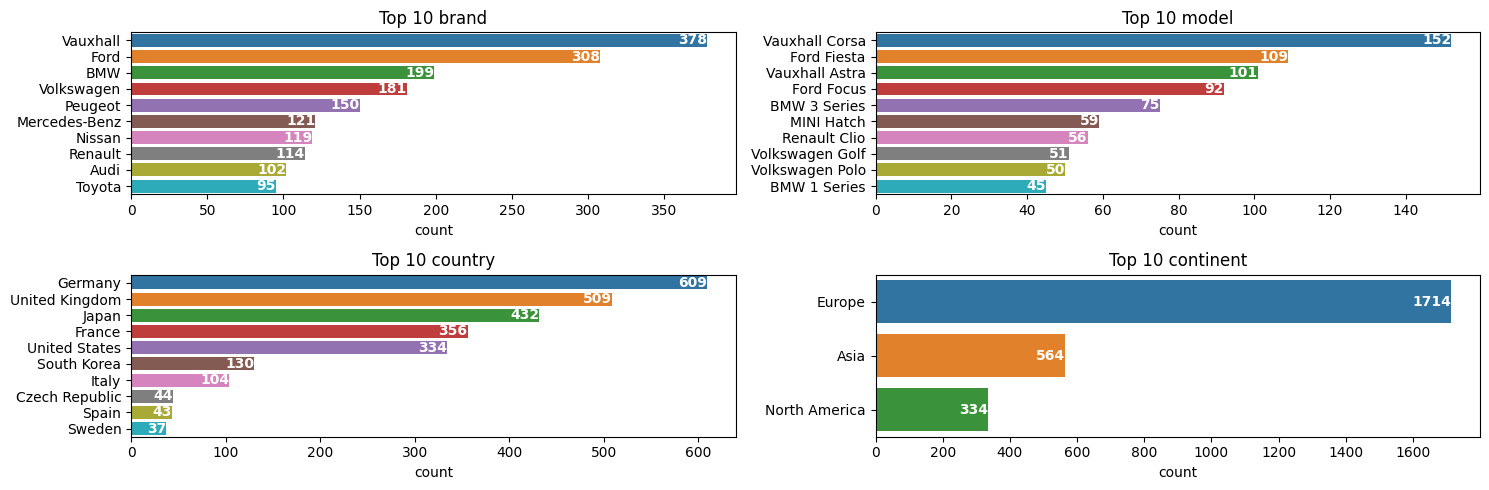

In [45]:
top10_col = ['brand','model','country','continent']

plt.figure(figsize=(15,5))

for idx, i in enumerate(top10_col):
    top10 = df[df[i].isin(df[i].value_counts().head(10).index)].reset_index(drop=True)
    plt.subplot(2,2,idx+1)
    ax=sns.countplot(y=i, data=top10, order=top10[i].value_counts().index)
    plt.title(f'Top 10 {i}')
    plt.ylabel('')
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height()/2, f'{int(width)}',
                ha='right', va='center', color='white',weight='bold')

plt.tight_layout()
plt.show()

### Bivariate Analysis

**numerical features correlation**

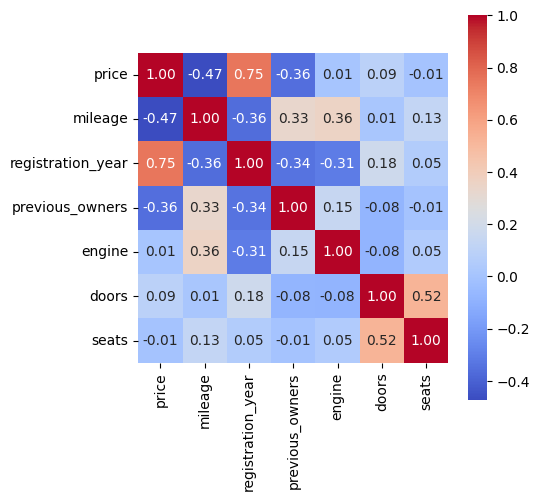

In [46]:
df_corr = df[num].corr()

plt.figure(figsize=(5,5))
sns.heatmap(df_corr,annot=True,fmt='.2f',square=True,cmap='coolwarm')
plt.show()

**Price VS Continue Features**

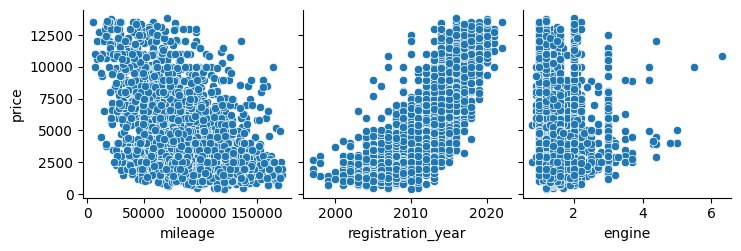

In [47]:
features = ['mileage','registration_year','engine','price']
sns.pairplot(df[features],x_vars=features[:-1],y_vars='price')

plt.show()

**Price VS Other Numeric Features**

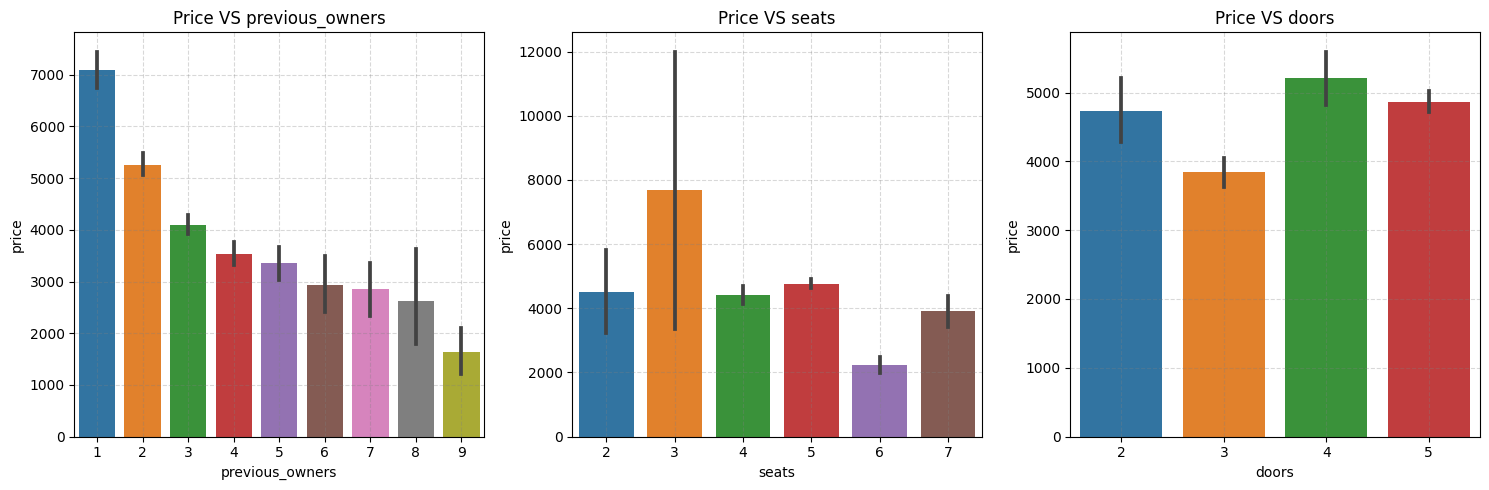

In [48]:
features = ['previous_owners','seats','doors']

plt.figure(figsize=(15,5))
for idx, i in enumerate(features):
    plt.subplot(1,3,idx+1)
    ax=sns.barplot(data=df, x=i, y='price')
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(f'Price VS {i}')

plt.tight_layout()

**Price VS Categorical Features**

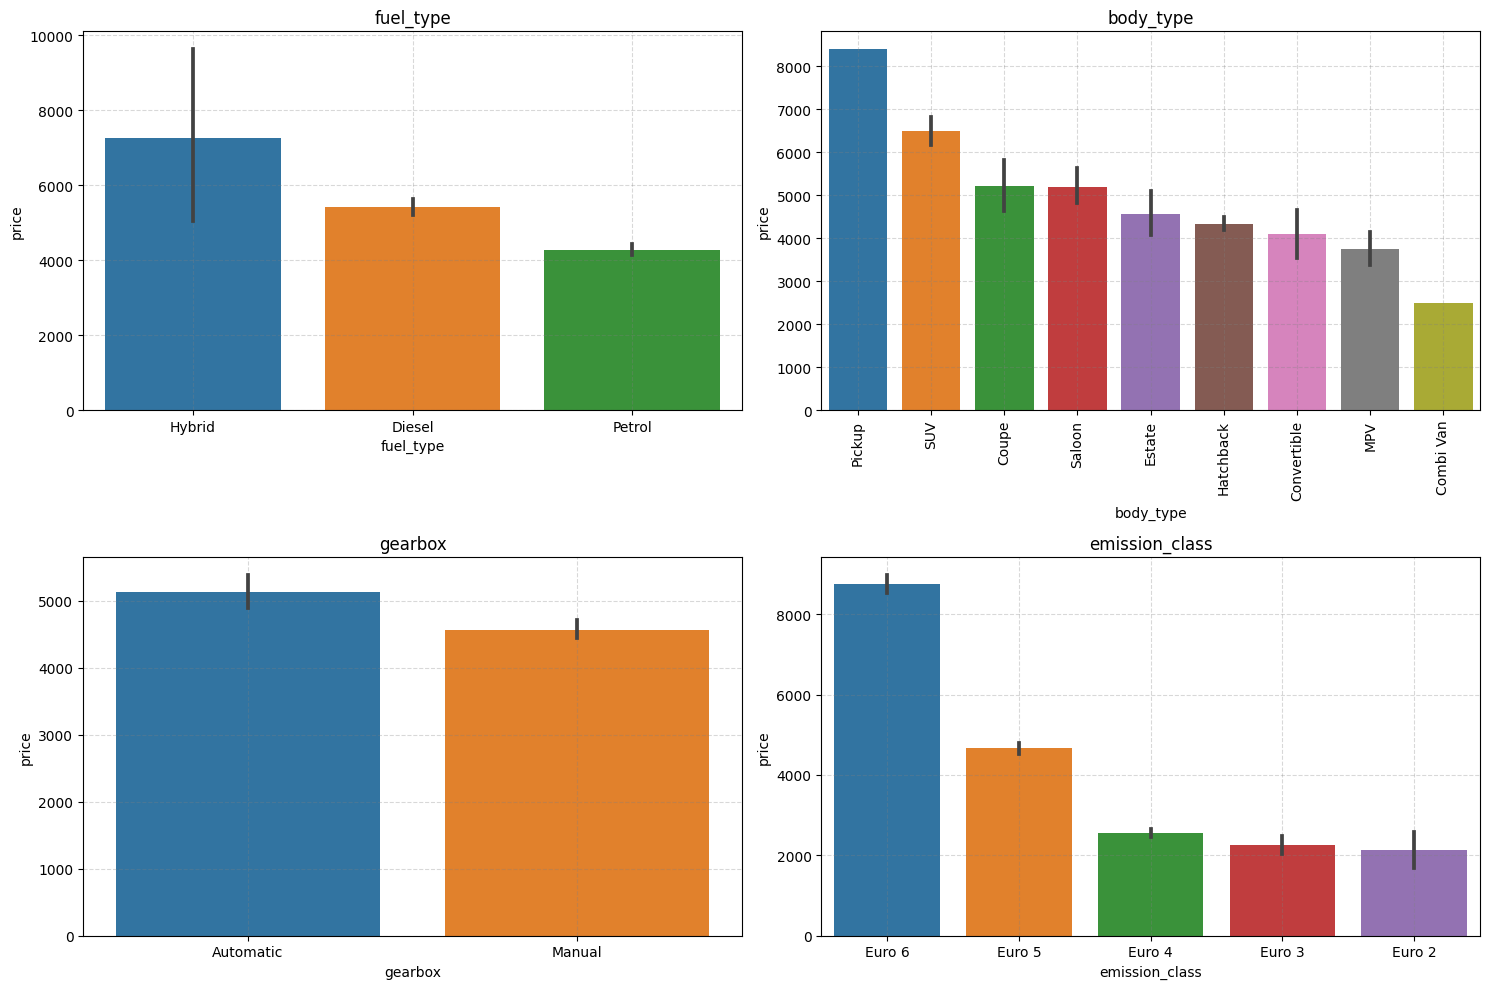

In [49]:
features = ['fuel_type','body_type','gearbox','emission_class']
plt.figure(figsize=(15,10))
for idx,i in enumerate(features):
    urut = df.groupby(i)['price'].mean().sort_values(ascending=False).index
    plt.subplot(2,2,idx+1)
    ax=sns.barplot(x=df[i],y=df['price'],order=urut)
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(i)
    if i=='body_type':
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Avg. Price VS Other Categorical Features**

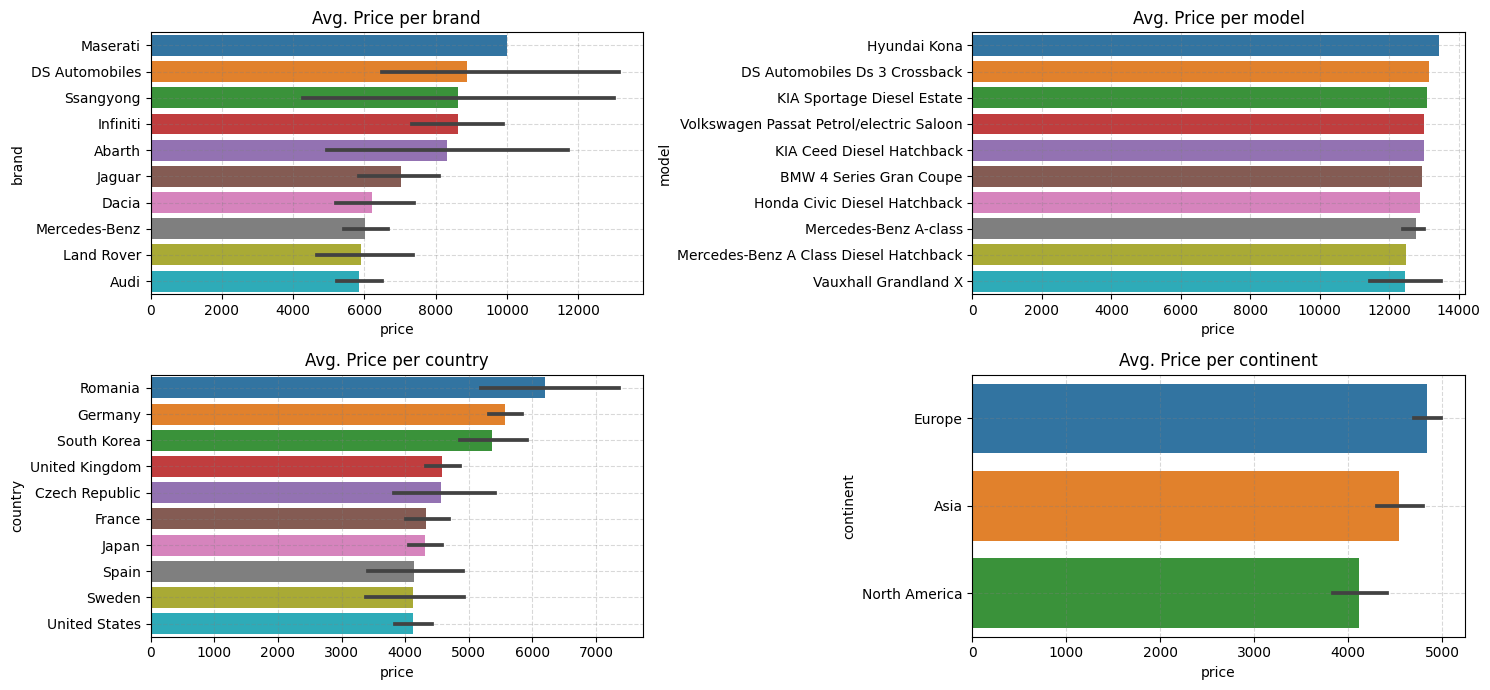

In [50]:
features = ['brand','model','country','continent']

plt.figure(figsize=(15,7))
for idx, i in enumerate(features):
    top10 = df.groupby(i)['price'].mean().sort_values(ascending=False).head(10)
    df_top10 = df[df[i].isin(top10.index)]
    plt.subplot(2,2,idx+1)
    sns.barplot(data=df_top10,x='price',y=i,order=top10.index)
    plt.title(f'Avg. Price per {i}')
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

**Reg. Year VS Emission Class**

In [51]:
euro_year = pd.pivot_table(df,index='emission_class',columns='registration_year',aggfunc='size', fill_value=0)
euro_year.T

emission_class,Euro 2,Euro 3,Euro 4,Euro 5,Euro 6
registration_year,,,,,
1997,3,0,0,0,0
1998,3,0,0,0,0
1999,1,3,0,0,0
2000,1,2,1,0,0
2001,5,5,5,0,0
2002,2,19,9,0,0
2003,0,33,17,0,0
2004,0,35,29,0,0
2005,1,25,50,0,1


In [52]:
def correlation(df,a,b):
    chi2, p, _, _ = chi2_contingency(pd.crosstab(df[a], df[b]))
    print(a,' VS ',b)
    print(f'Chi-square statistic: {chi2}')
    print(f'P-value: {p}')

**Correlation between Brand, Country, Continent, and Model**

In [53]:
features = ['brand','country','continent']

for i in features:
    correlation(df,i,'model')

brand  VS  model
Chi-square statistic: 114928.0
P-value: 0.0
country  VS  model
Chi-square statistic: 28732.0
P-value: 0.0
continent  VS  model
Chi-square statistic: 5224.0
P-value: 0.0


**Correlation between seats, doors, and body_type**

In [54]:
features = ['seats','doors']

for i in features:
    correlation(df,i,'body_type')

seats  VS  body_type
Chi-square statistic: 2977.1435570695094
P-value: 0.0
doors  VS  body_type
Chi-square statistic: 5131.622064530542
P-value: 0.0


### Multivariate Analysis

**Price VS Continous Features by Gearbox**

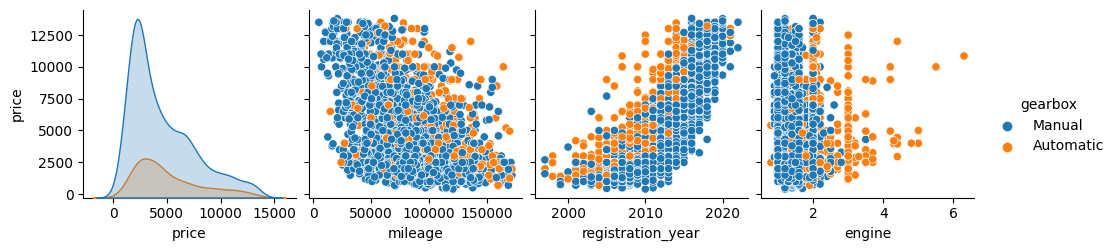

In [55]:
features = ['price','mileage','registration_year','engine']

sns.pairplot(df,hue='gearbox',x_vars=features,y_vars='price')

plt.show()

**Price VS Other Numeric Features by Gearbox**

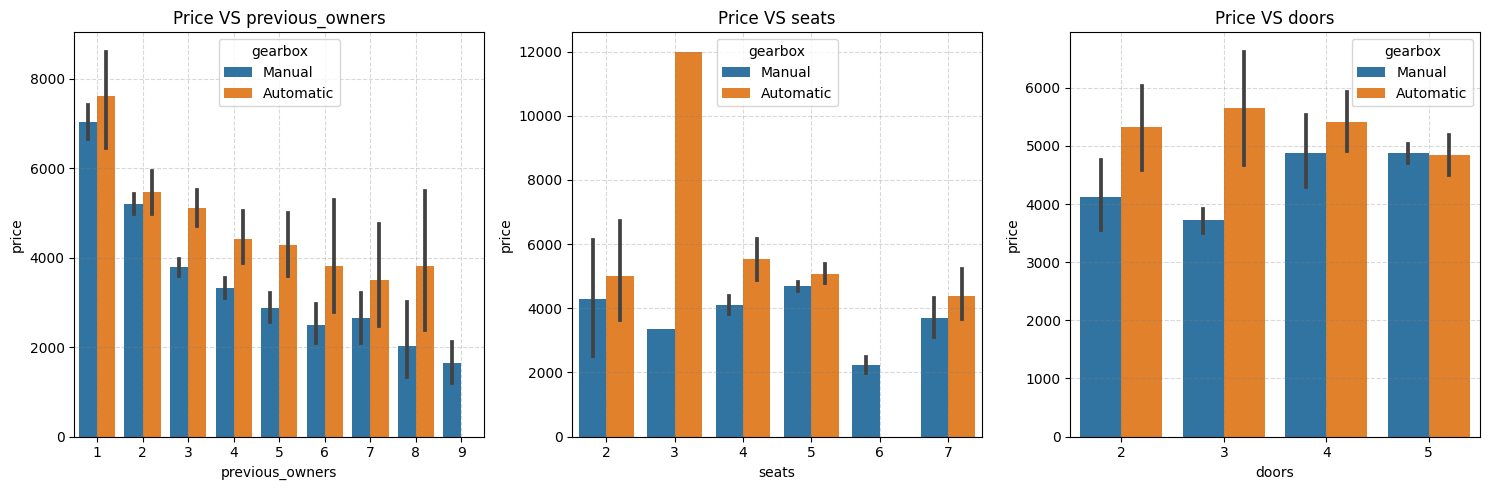

In [56]:
features = ['previous_owners','seats','doors']

plt.figure(figsize=(15,5))
for idx, i in enumerate(features):
    plt.subplot(1,3,idx+1)
    ax=sns.barplot(data=df, x=i, y='price',hue='gearbox')
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(f'Price VS {i}')

plt.tight_layout()

**Price VS Categorical Features by Gearbox**

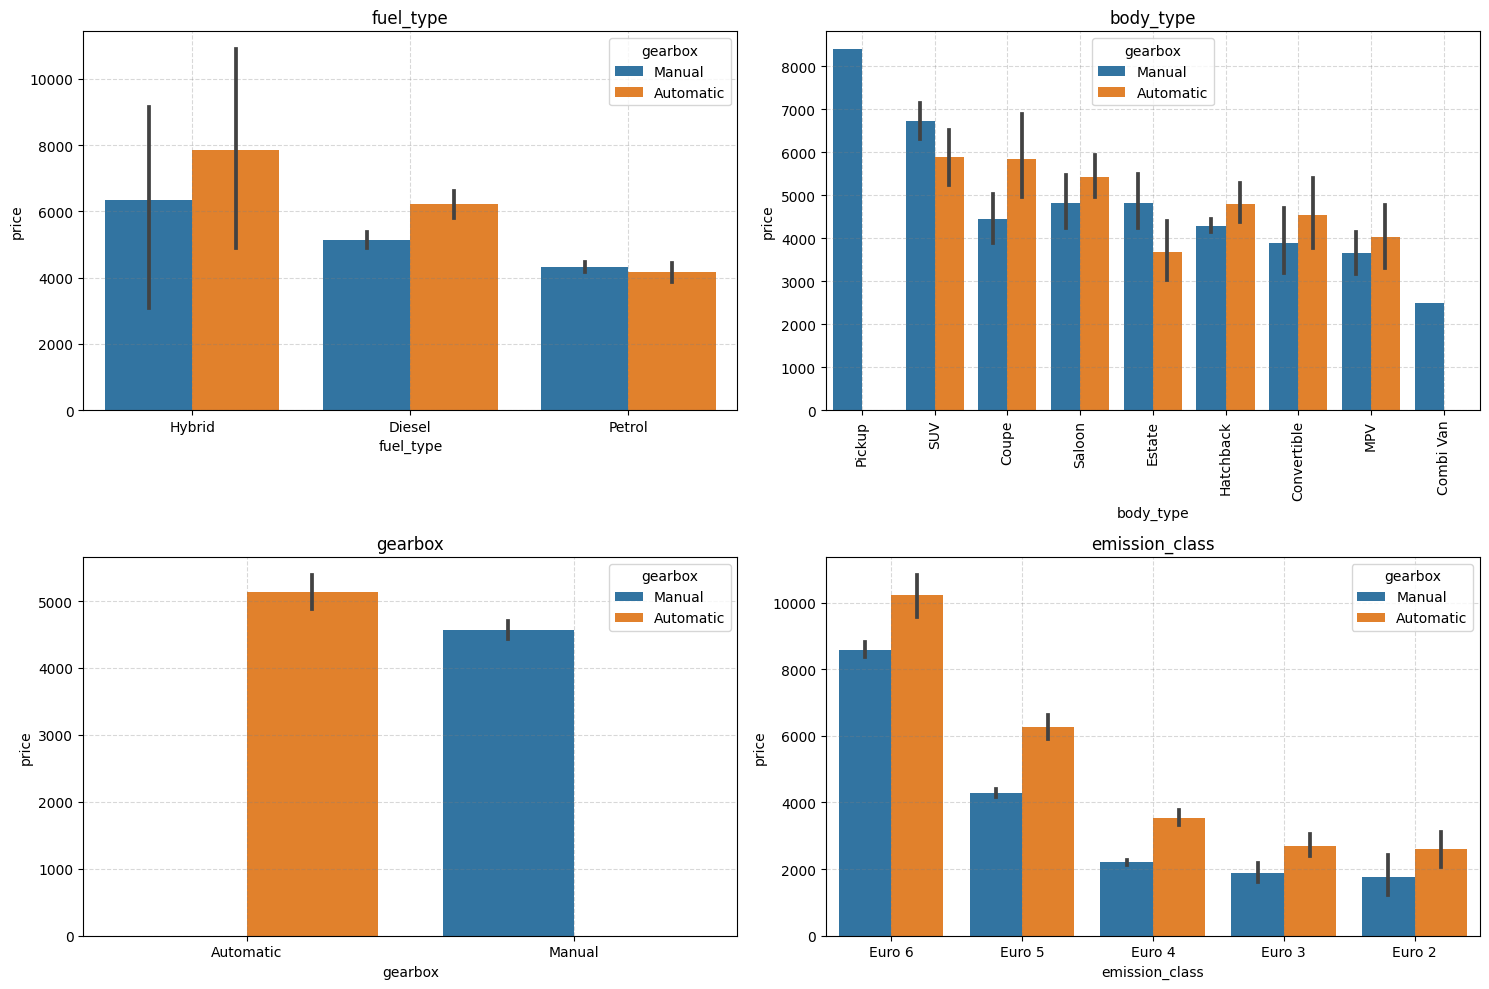

In [57]:
features = ['fuel_type','body_type','gearbox','emission_class']
plt.figure(figsize=(15,10))
for idx,i in enumerate(features):
    urut = df.groupby(i)['price'].mean().sort_values(ascending=False).index
    plt.subplot(2,2,idx+1)
    ax=sns.barplot(x=df[i],y=df['price'], order=urut, hue=df['gearbox'])
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(i)
    if i=='body_type':
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Avg. Price VS Other Categorical Features by GearBox**

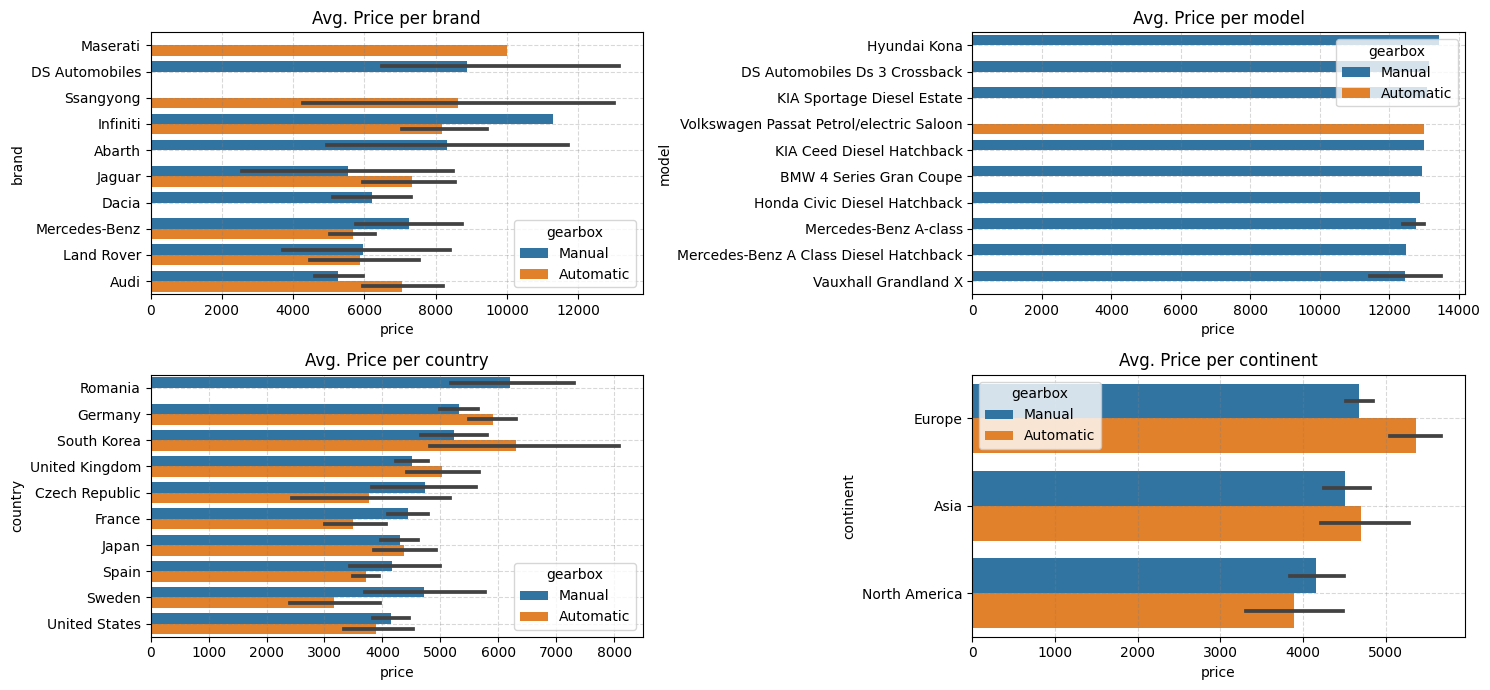

In [58]:
features = ['brand','model','country','continent']

plt.figure(figsize=(15,7))
for idx, i in enumerate(features):
    top10 = df.groupby(i)['price'].mean().sort_values(ascending=False).head(10)
    df_top10 = df[df[i].isin(top10.index)]
    plt.subplot(2,2,idx+1)
    sns.barplot(data=df_top10,x='price',y=i,order=top10.index, hue='gearbox')
    plt.title(f'Avg. Price per {i}')
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

**Body Type VS Doors VS Seats**

In [59]:
bds = pd.pivot_table(df,index='body_type',columns=['seats', 'doors'],aggfunc='size', fill_value=0)
bds.T

body_type    Combi Van  Convertible  Coupe  Estate  Hatchback  MPV  Pickup  \
seats doors                                                                  
2     2              0           21      2       0          0    0       0   
      5              0            0      0       1          0    0       0   
3     2              0            0      1       0          0    0       0   
      3              0            0      0       0          1    0       0   
4     2              0           63     57       0          0    0       0   
      3              0            1      9       0        200    0       0   
      4              0            0      1       0          1    0       0   
      5              0            0      0       0         59    0       0   
5     2              0            1      6       0          0    0       0   
      3              0            0     14       0        305    0       0   
      4              0            0      0       0          0    0       1   
      5              0            0      0     104       1055   65       0   
6     5              1            0      0       0          0    2       0   
7     5              0            0      0       0          0   59       0   

body_type    SUV  Saloon  
seats doors               
2     2        0       0  
      5        0       0  
3     2        0       0  
      3        0       0  
4     2        0       0  
      3        1       0  
      4        0       3  
      5        0       0  
5     2        0       0  
      3        2       0  
      4        0     268  
      5      286       0  
6     5        0       0  
7     5       22       0

# 4. Data Preparation

## Data Cleaning

### Outliers Handling (df_imputed)

In [60]:
df_imputed.head()

,mileage,registration_year,previous_owners,body_type,engine,doors,seats,emission_class,fuel_type_Hybrid,fuel_type_Petrol,gearbox_Manual,price
0,70189.0,2016.0,3,1350.0,1.4,5.0,5.0,6.0,0.0,0.0,1.0,6900.0
1,88585.0,2008.0,4,1350.0,1.2,3.0,5.0,4.0,0.0,1.0,1.0,1495.0
2,137000.0,2011.0,2,1350.0,1.4,5.0,5.0,5.0,0.0,1.0,1.0,949.0
3,96731.0,2010.0,5,1350.0,1.4,3.0,4.0,4.0,0.0,1.0,1.0,2395.0
4,85000.0,2013.0,4,1350.0,1.3,5.0,5.0,5.0,0.0,0.0,1.0,1000.0


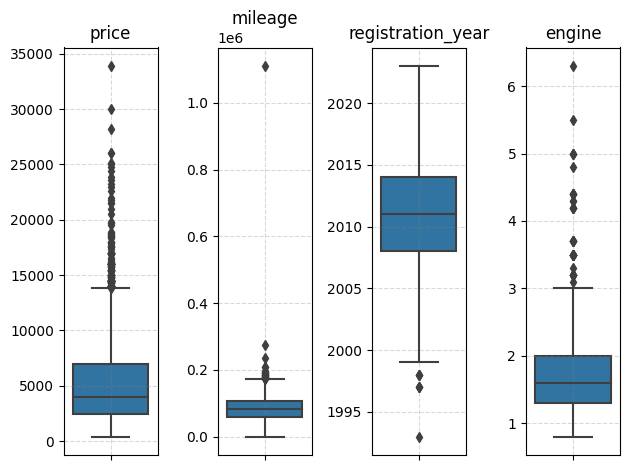

In [61]:
kontinu = ['price','mileage','registration_year','engine']
for i in range(0,len(kontinu)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df_imputed[kontinu[i]])
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(kontinu[i])
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [62]:
df_imputed = df_imputed.drop(df_imputed[df_imputed['registration_year'] == 1993].index)

In [63]:
kontinu = ['price','mileage']
for i in kontinu:
    Q3 = df_imputed[i].quantile(0.75)
    Q1 = df_imputed[i].quantile(0.25)
    IQR = Q3-Q1
    bawah = Q1-1.5*IQR
    atas = Q3+1.5*IQR
    outlier = (df_imputed[i] < bawah) | (df_imputed[i] > atas)
    df_imputed = df_imputed[~outlier]

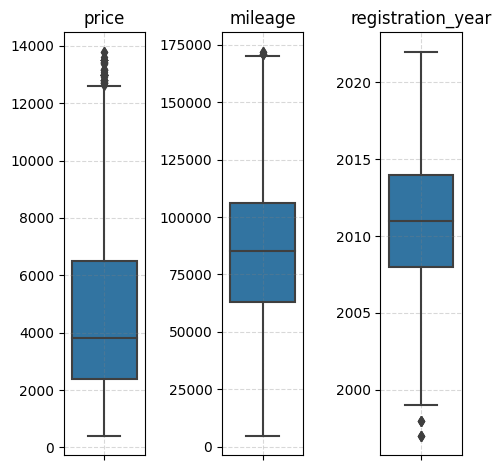

In [64]:
kontinu = ['price','mileage','registration_year']
for i in range(0,len(kontinu)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y=df_imputed[kontinu[i]])
    plt.grid(True, linestyle = '--', color = 'grey', alpha = 0.3)
    plt.title(kontinu[i])
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [65]:
df_imputed.reset_index(drop=True,inplace=True)

## Data Transformation

### Encoding

In [66]:
df.reset_index(drop=True,inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model              2612 non-null   object 
 1   price              2612 non-null   float64
 2   mileage            2612 non-null   float64
 3   registration_year  2612 non-null   int64  
 4   previous_owners    2612 non-null   int64  
 5   fuel_type          2612 non-null   object 
 6   body_type          2612 non-null   object 
 7   engine             2612 non-null   float64
 8   gearbox            2612 non-null   object 
 9   doors              2612 non-null   int32  
 10  seats              2612 non-null   int32  
 11  emission_class     2612 non-null   object 
 12  brand              2612 non-null   object 
 13  country            2612 non-null   object 
 14  continent          2612 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 285.8+ KB


In [68]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mileage            2612 non-null   float64
 1   registration_year  2612 non-null   float64
 2   previous_owners    2612 non-null   int64  
 3   body_type          2612 non-null   float64
 4   engine             2612 non-null   float64
 5   doors              2612 non-null   float64
 6   seats              2612 non-null   float64
 7   emission_class     2612 non-null   float64
 8   fuel_type_Hybrid   2612 non-null   float64
 9   fuel_type_Petrol   2612 non-null   float64
 10  gearbox_Manual     2612 non-null   float64
 11  price              2612 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 245.0 KB


In [69]:
##one-hot & label encoding
oh_col = ['continent']
one_hot = pd.get_dummies(df[oh_col],drop_first=True)
df = pd.concat([df.drop(columns=oh_col), one_hot], axis=1)
df = df.replace({False:0,True:1},regex=True)

In [70]:
df.columns

Index(['model', 'price', 'mileage', 'registration_year', 'previous_owners',
       'fuel_type', 'body_type', 'engine', 'gearbox', 'doors', 'seats',
       'emission_class', 'brand', 'country', 'continent_Europe',
       'continent_North America'],
      dtype='object')

In [71]:
df_imputed['europe_brand'] = df['continent_Europe']
df_imputed['America_brand'] = df['continent_North America']

In [72]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mileage            2612 non-null   float64
 1   registration_year  2612 non-null   float64
 2   previous_owners    2612 non-null   int64  
 3   body_type          2612 non-null   float64
 4   engine             2612 non-null   float64
 5   doors              2612 non-null   float64
 6   seats              2612 non-null   float64
 7   emission_class     2612 non-null   float64
 8   fuel_type_Hybrid   2612 non-null   float64
 9   fuel_type_Petrol   2612 non-null   float64
 10  gearbox_Manual     2612 non-null   float64
 11  price              2612 non-null   float64
 12  europe_brand       2612 non-null   uint8  
 13  America_brand      2612 non-null   uint8  
dtypes: float64(11), int64(1), uint8(2)
memory usage: 250.1 KB


In [73]:
##to int
integral = ['doors','seats','gearbox_Manual','fuel_type_Petrol','fuel_type_Hybrid','body_type','registration_year','europe_brand','America_brand']
for col in integral:
    df_imputed[col] = df_imputed[col].astype(int)
    print(col,' : ',df_imputed[col].dtype)

doors  :  int32
seats  :  int32
gearbox_Manual  :  int32
fuel_type_Petrol  :  int32
fuel_type_Hybrid  :  int32
body_type  :  int32
registration_year  :  int32
europe_brand  :  int32
America_brand  :  int32


In [74]:
df_encoded = df_imputed.copy()

In [75]:
df = df_imputed.copy()

## Feature Selection I

In [76]:
#vif score
X = add_constant(df.drop(columns='price'))

vif_score = pd.DataFrame([vif(X.values, i)
                          for i in range(X.shape[1])],
                          index=X.columns).reset_index()
vif_score.columns = ['feature', 'vif_score']
vif_score = vif_score.loc[vif_score.feature!='const']
vif_score

,feature,vif_score
1,mileage,1.449775
2,registration_year,6.079685
3,previous_owners,1.207096
4,body_type,1.493056
5,engine,1.962339
6,doors,1.548998
7,seats,1.444250
8,emission_class,5.610208
9,fuel_type_Hybrid,1.035824
10,fuel_type_Petrol,1.490673


<Axes: >

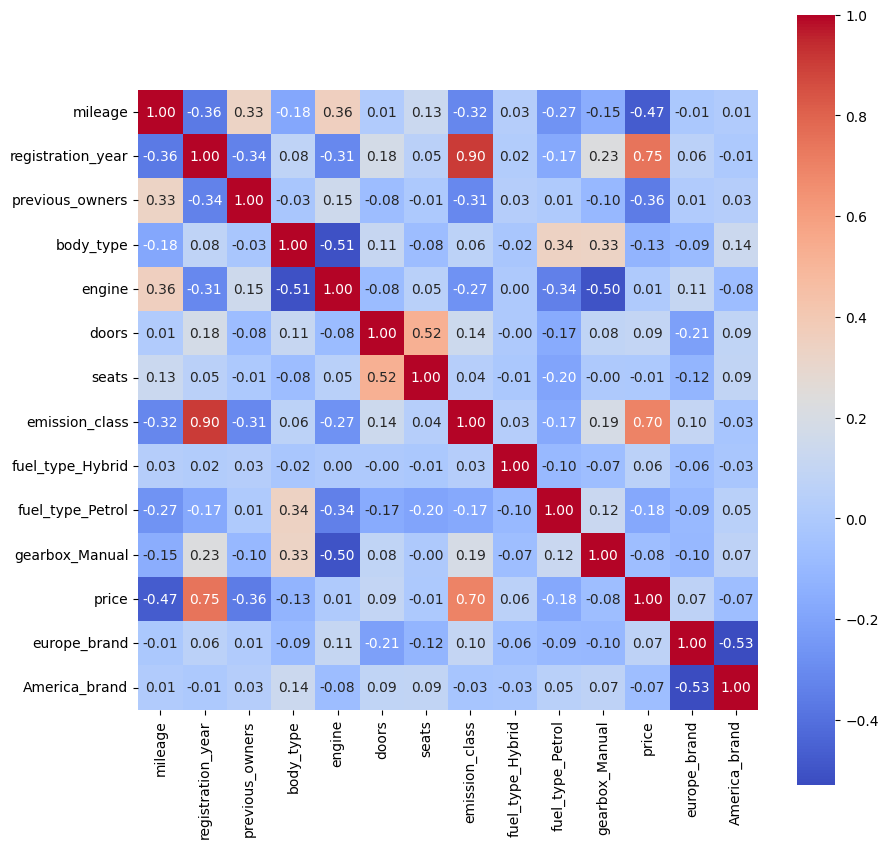

In [77]:
#feature selection 2
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',square=True,cmap='coolwarm')

In [78]:
df.drop(columns='emission_class',inplace=True)

In [79]:
#vif score
X = add_constant(df.drop(columns='price'))

vif_score = pd.DataFrame([vif(X.values, i)
                          for i in range(X.shape[1])],
                          index=X.columns).reset_index()
vif_score.columns = ['feature', 'vif_score']
vif_score = vif_score.loc[vif_score.feature!='const']
vif_score

,feature,vif_score
1,mileage,1.448675
2,registration_year,1.525173
3,previous_owners,1.206462
4,body_type,1.492795
5,engine,1.961666
6,doors,1.548068
7,seats,1.444241
8,fuel_type_Hybrid,1.034425
9,fuel_type_Petrol,1.489414
10,gearbox_Manual,1.395123


In [80]:
df_hampirready = df.copy()

## Scaling

In [96]:
df = df_hampirready.copy()

In [97]:
#define features & target
X = df.drop(columns='price')
y = df[['price']]

#split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modeling

## Model Selection

In [98]:
#models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(random_state=1),
    "Lasso": Lasso(random_state=1),
    "ElasticNet": ElasticNet(random_state=1),
    "Decision Tree": DecisionTreeRegressor(random_state=1),
    "Random Forest": RandomForestRegressor(random_state=1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=1),
    "Neural Network": MLPRegressor(random_state=1),}

#eval metrics
y_preds ={}
train_r2 = {}
test_r2 = {}
train_mae = {}
test_mae = {}
train_mse = {}
test_mse = {}

#fit_pred
for name, mdl in models.items():
    mdl.fit(X_train_scaled,y_train)
    y_pred_train = mdl.predict(X_train_scaled)
    y_pred_test = mdl.predict(X_test_scaled)
    train_r2[name] = r2_score(y_train, y_pred_train)
    test_r2[name] = r2_score(y_test, y_pred_test)
    train_mae[name] = mean_absolute_error(y_train, y_pred_train)
    test_mae[name] = mean_absolute_error(y_test, y_pred_test)
    train_mse[name] = mean_squared_error(y_train, y_pred_train)
    test_mse[name] = mean_squared_error(y_test, y_pred_test)

#evaluation
eval = pd.DataFrame({'model':list(models.keys()),
                    'train r2':list(train_r2.values()),
                    'test r2':list(test_r2.values()),
                    'train mae': list(train_mae.values()),
                     'test mae': list(test_mae.values()),
                    'train mse': list(train_mse.values()),
                     'test mse': list(test_mse.values())})
eval

,model,train r2,test r2,train mae,test mae,train mse,test mse
0,Linear,0.739213,0.739583,1224.402536,1237.239468,2.455937e+06,2.415864e+06
1,Ridge,0.739212,0.739580,1224.382666,1237.202174,2.455939e+06,2.415894e+06
2,Lasso,0.739211,0.739553,1224.313579,1237.237101,2.455952e+06,2.416145e+06
3,ElasticNet,0.661870,0.663136,1379.822427,1381.488873,3.184306e+06,3.125055e+06
4,Decision Tree,0.999875,0.596637,1.385831,1381.013384,1.174466e+03,3.741965e+06
5,Random Forest,0.972173,0.786783,369.142032,1074.890739,2.620548e+05,1.977993e+06
6,Gradient Boosting,0.856403,0.813298,854.548768,1008.101459,1.352308e+06,1.732021e+06
7,Neural Network,-0.448340,-0.422354,2954.646243,2889.601282,1.363959e+07,1.319506e+07


## Baseline

In [99]:
crossvalidation = KFold(n_splits=10,shuffle=True,random_state=1)

for i in range(1,10):
    tree_reg = DecisionTreeRegressor(max_depth=i, random_state=1)
    if tree_reg.fit(X_train_scaled,y_train).tree_.max_depth<i:
        break
    score=np.mean(cross_val_score(tree_reg,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=crossvalidation,n_jobs=1))
    print(i,score)

1 -5150050.996678242
2 -3890119.651898682
3 -3211532.6486283154
4 -2873310.2147802883
5 -2612073.346752316
6 -2407249.651484159
7 -2476138.50736119
8 -2647405.1675787424
9 -2856691.48415573


depth: 6 -2407249.651484159

# Tuning Gradient Boost

In [100]:
gbr = GradientBoostingRegressor()

parameters = {
    'n_estimators': sp_ranInt(100,1000),
    'learning_rate': sp_randFloat(),
    'max_depth': sp_ranInt(4,10),
    'subsample': sp_randFloat(),
    'random_state': [1]
}

search = RandomizedSearchCV(gbr, parameters, cv=crossvalidation,scoring='neg_mean_squared_error', n_jobs=1)
search.fit(X_train_scaled, y_train)
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.010438767502600754, 'max_depth': 4, 'n_estimators': 979, 'random_state': 1, 'subsample': 0.3555881413785267}
-1634959.4280130507


In [101]:
best_params = search.best_params_
#models
models = {
    'GradientBoosting' : GradientBoostingRegressor(**best_params)
}

#eval metrics
y_preds ={}
train_r2 = {}
test_r2 = {}
train_mae = {}
test_mae = {}
train_mse = {}
test_mse = {}

#fit_pred
for name, mdl in models.items():
    mdl.fit(X_train_scaled,y_train)
    y_pred_train = mdl.predict(X_train_scaled)
    y_pred_test = mdl.predict(X_test_scaled)
    train_r2[name] = r2_score(y_train, y_pred_train)
    test_r2[name] = r2_score(y_test, y_pred_test)
    train_mae[name] = mean_absolute_error(y_train, y_pred_train)
    test_mae[name] = mean_absolute_error(y_test, y_pred_test)
    train_mse[name] = mean_squared_error(y_train, y_pred_train)
    test_mse[name] = mean_squared_error(y_test, y_pred_test)

#evaluation
eval_tuning = pd.DataFrame({'model':list(models.keys()),
                    'train r2':list(train_r2.values()),
                    'test r2':list(test_r2.values()),
                    'train mae': list(train_mae.values()),
                     'test mae': list(test_mae.values()),
                    'train mse': list(train_mse.values()),
                     'test mse': list(test_mse.values())})
eval_tuning

,model,train r2,test r2,train mae,test mae,train mse,test mse
0,GradientBoosting,0.889526,0.821414,762.330661,977.320034,1.040374e+06,1.656728e+06


In [102]:
eval[eval['model']=='Gradient Boosting']

,model,train r2,test r2,train mae,test mae,train mse,test mse
6,Gradient Boosting,0.856403,0.813298,854.548768,1008.101459,1.352308e+06,1.732021e+06
